## Dependencias

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from scipy.stats import ks_2samp
from varclushi import VarClusHi

pd.set_option('display.float_format',lambda x:"%.4f"%x)

## Carga de datos


In [2]:
tad = pd.read_pickle('tad_ecobici_prediccion_demanda.pkl')

In [3]:
tad.shape

(5240929, 15)

In [4]:
tad.head()

,Ciclo_Estacion_Retiro,ancla,x_num_duracion_prom_min_24,x_num_edad_min_24,x_num_prop_mujeres_min_24,x_num_viajes_min_24,x_num_duracion_prom_max_24,x_num_edad_max_24,x_num_prop_mujeres_max_24,x_num_viajes_max_24,x_num_duracion_prom_mean_24,x_num_edad_mean_24,x_num_prop_mujeres_mean_24,x_num_viajes_mean_24,y
0,1.0000,24,6.5375,25.0000,0.0000,1.0000,17.1406,45.2143,0.5000,42.0000,11.6953,35.7691,0.2471,16.6957,14.0000
1,2.0000,24,4.6167,24.5000,0.0000,2.0000,27.2583,45.0000,0.8000,10.0000,13.5370,35.9489,0.2820,5.1304,2.0000
2,3.0000,24,5.7972,24.0000,0.0000,0.0000,332.5150,51.0000,0.5000,16.0000,47.6064,34.8143,0.1568,3.3684,4.0000
3,4.0000,24,3.7250,27.0000,0.0000,0.0000,22.3741,57.0000,1.0000,17.0000,11.4842,36.6807,0.2122,4.9565,2.0000
4,5.0000,24,8.5667,21.0000,0.0000,0.0000,19.3867,41.0000,1.0000,14.0000,14.1046,33.2719,0.1818,4.3478,7.0000


## Listado de variables

In [33]:
um = ['Ciclo_Estacion_Retiro','ancla']
varc = tad.filter(like='x_').columns.tolist()
tgt = 'y'

In [99]:
X = tad[varc].copy()

## Análisis Univariado

In [100]:
X[varc].describe(percentiles=[0.01,0.05,0.95,0.99])

,x_num_duracion_prom_min_24,x_num_edad_min_24,x_num_duracion_prom_max_24,x_num_edad_max_24,x_num_viajes_max_24,x_num_duracion_prom_mean_24,x_num_edad_mean_24,x_num_viajes_mean_24
count,5232940.0000,5226628.0000,5232940.0000,5226628.0000,5240929.0000,5232940.0000,5226628.0000,5240929.0000
mean,5.1312,24.6378,71.6132,51.1508,10.4274,17.7908,35.2076,3.2435
std,239.5301,3.2552,2947.1461,8.0635,9.0274,476.9425,2.6905,2.3629
min,-1421.1500,16.0000,0.0167,16.0000,0.0000,-704.1250,16.0000,0.0000
1%,1.3500,18.0000,11.9750,34.6667,1.0000,7.2933,29.0000,0.4286
5%,2.0667,19.0000,16.3667,39.9000,2.0000,9.1671,31.2604,0.8462
50%,4.3625,25.0000,28.4167,50.0000,8.0000,13.1125,35.0731,2.6364
95%,8.5667,29.5000,127.3500,65.0000,25.0000,24.1642,39.5719,7.6818
99%,12.1667,32.0000,573.7333,72.0000,39.0000,54.4358,42.7583,11.7391
max,472423.9750,78.0000,972872.6333,118.0000,190.0000,472423.9750,78.0000,39.2500


array([[<AxesSubplot:title={'center':'x_num_duracion_prom_min_24'}>,
        <AxesSubplot:title={'center':'x_num_edad_min_24'}>,
        <AxesSubplot:title={'center':'x_num_duracion_prom_max_24'}>],
       [<AxesSubplot:title={'center':'x_num_edad_max_24'}>,
        <AxesSubplot:title={'center':'x_num_viajes_max_24'}>,
        <AxesSubplot:title={'center':'x_num_duracion_prom_mean_24'}>],
       [<AxesSubplot:title={'center':'x_num_edad_mean_24'}>,
        <AxesSubplot:title={'center':'x_num_viajes_mean_24'}>,
        <AxesSubplot:>]], dtype=object)

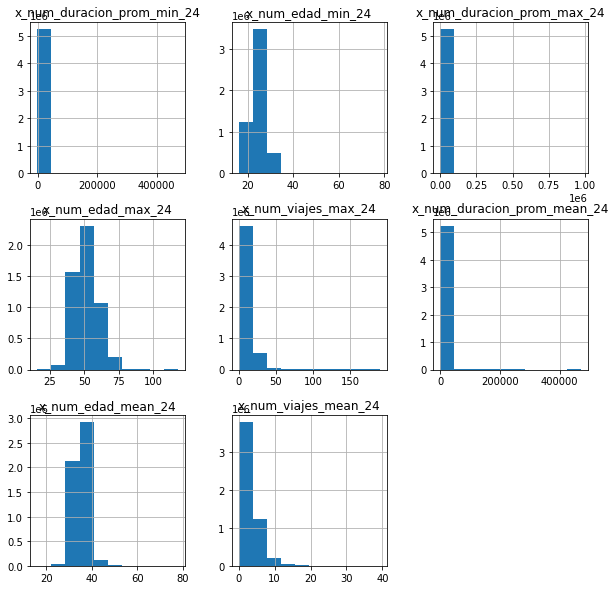

In [101]:
X[varc].hist(figsize=(10,10))

### Valores ausentes

In [102]:
miss = 1-X[varc].describe().T[['count']]/len(tad)

In [103]:
miss

,count
x_num_duracion_prom_min_24,0.0015
x_num_edad_min_24,0.0027
x_num_duracion_prom_max_24,0.0015
x_num_edad_max_24,0.0027
x_num_viajes_max_24,0.0000
x_num_duracion_prom_mean_24,0.0015
x_num_edad_mean_24,0.0027
x_num_viajes_mean_24,0.0000


In [104]:
X.shape,X.dropna().shape,X.dropna().shape[0]/X.shape[0]

((5240929, 8), (5218639, 8), 0.9957469372319296)

### Imputación de ausentes

In [105]:
im = SimpleImputer(strategy='median')

In [106]:
im.fit(X)

SimpleImputer(strategy='median')

In [107]:
X[varc] = im.transform(X[varc])

In [108]:
X.shape,X.dropna().shape,X.dropna().shape[0]/X.shape[0]

((5240929, 8), (5240929, 8), 1.0)

#### Validar que la distribución no fue alterada

In [109]:
ks = pd.DataFrame(map(lambda v:(v,ks_2samp(tad[v].dropna(),X[v]).statistic),varc),
                  columns=['var','ks'])

In [110]:
ks

,var,ks
0,x_num_duracion_prom_min_24,0.0008
1,x_num_edad_min_24,0.0013
2,x_num_duracion_prom_max_24,0.0008
3,x_num_edad_max_24,0.0014
4,x_num_viajes_max_24,0.0000
5,x_num_duracion_prom_mean_24,0.0008
6,x_num_edad_mean_24,0.0014
7,x_num_viajes_mean_24,0.0000


### Varianza

In [112]:
vt = VarianceThreshold(threshold=1)

In [113]:
vt.fit(X[varc])

VarianceThreshold(threshold=1)

In [114]:
sin_varianza = [v for v,u in zip(varc,vt.get_support()) if not(u)]
sin_varianza

[]

In [115]:
X.drop(sin_varianza,axis=1,inplace=True)

In [116]:
varc = [v for v in varc if v not in sin_varianza]

### Valores extremos

#### Cerca percentil

In [117]:
ext = X[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index()

for v,li,ls in ext.values:
    X[f'ol_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)

X['ext'] = X.filter(like='ol_').max(axis=1)
X.drop(X.filter(like='ol_').columns,axis=1,inplace=True)
X['ext'].value_counts(True)

0   0.8984
1   0.1016
Name: ext, dtype: float64

### Cerca inter-cuartil $\mu\pm kIQR$

In [118]:
# k=2(moderado), k=3 (fuerte)
k = 2
ext = X[varc].describe().T[['25%','75%','mean']].reset_index()
ext['IQR'] = ext['75%']-ext['25%']
ext['li'] = ext['mean']-k*ext['IQR']
ext['ls'] = ext['mean']+k*ext['IQR']
ext = ext[['index','li','ls']]

In [119]:
for v,li,ls in ext.values:
    X[f'ol_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
    X['ext_iqr'] = X.filter(like='ol_').max(axis=1)
    X.drop(X.filter(like='ol_').columns,axis=1,inplace=True)
    X['ext_iqr'].value_counts(True)
X['ext_iqr'].value_counts(True)

0   0.9627
1   0.0373
Name: ext_iqr, dtype: float64

In [120]:
X[um] = tad[um]

In [121]:
X = X.loc[X['ext']==0].reset_index(drop=True).drop(['ext','ext_iqr'],axis=1)

array([[<AxesSubplot:title={'center':'x_num_duracion_prom_min_24'}>,
        <AxesSubplot:title={'center':'x_num_edad_min_24'}>,
        <AxesSubplot:title={'center':'x_num_duracion_prom_max_24'}>],
       [<AxesSubplot:title={'center':'x_num_edad_max_24'}>,
        <AxesSubplot:title={'center':'x_num_viajes_max_24'}>,
        <AxesSubplot:title={'center':'x_num_duracion_prom_mean_24'}>],
       [<AxesSubplot:title={'center':'x_num_edad_mean_24'}>,
        <AxesSubplot:title={'center':'x_num_viajes_mean_24'}>,
        <AxesSubplot:>]], dtype=object)

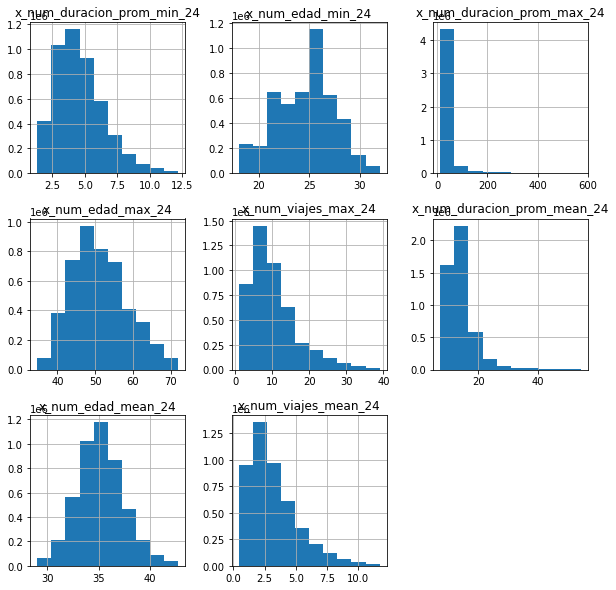

In [122]:
X[varc].hist(figsize=(10,10))

## Análisis bivariado

In [123]:
X[varc].corr()

,x_num_duracion_prom_min_24,x_num_edad_min_24,x_num_duracion_prom_max_24,x_num_edad_max_24,x_num_viajes_max_24,x_num_duracion_prom_mean_24,x_num_edad_mean_24,x_num_viajes_mean_24
x_num_duracion_prom_min_24,1.0000,0.0528,0.0333,-0.0546,0.1034,0.3085,0.0042,0.1284
x_num_edad_min_24,0.0528,1.0000,-0.0100,-0.0344,0.2058,-0.0319,0.3429,0.2755
x_num_duracion_prom_max_24,0.0333,-0.0100,1.0000,0.0082,0.0171,0.7691,0.0065,-0.0098
x_num_edad_max_24,-0.0546,-0.0344,0.0082,1.0000,-0.1461,0.0157,0.5733,-0.1887
x_num_viajes_max_24,0.1034,0.2058,0.0171,-0.1461,1.0000,-0.0437,-0.0131,0.8380
x_num_duracion_prom_mean_24,0.3085,-0.0319,0.7691,0.0157,-0.0437,1.0000,0.0163,-0.1025
x_num_edad_mean_24,0.0042,0.3429,0.0065,0.5733,-0.0131,0.0163,1.0000,0.0115
x_num_viajes_mean_24,0.1284,0.2755,-0.0098,-0.1887,0.8380,-0.1025,0.0115,1.0000


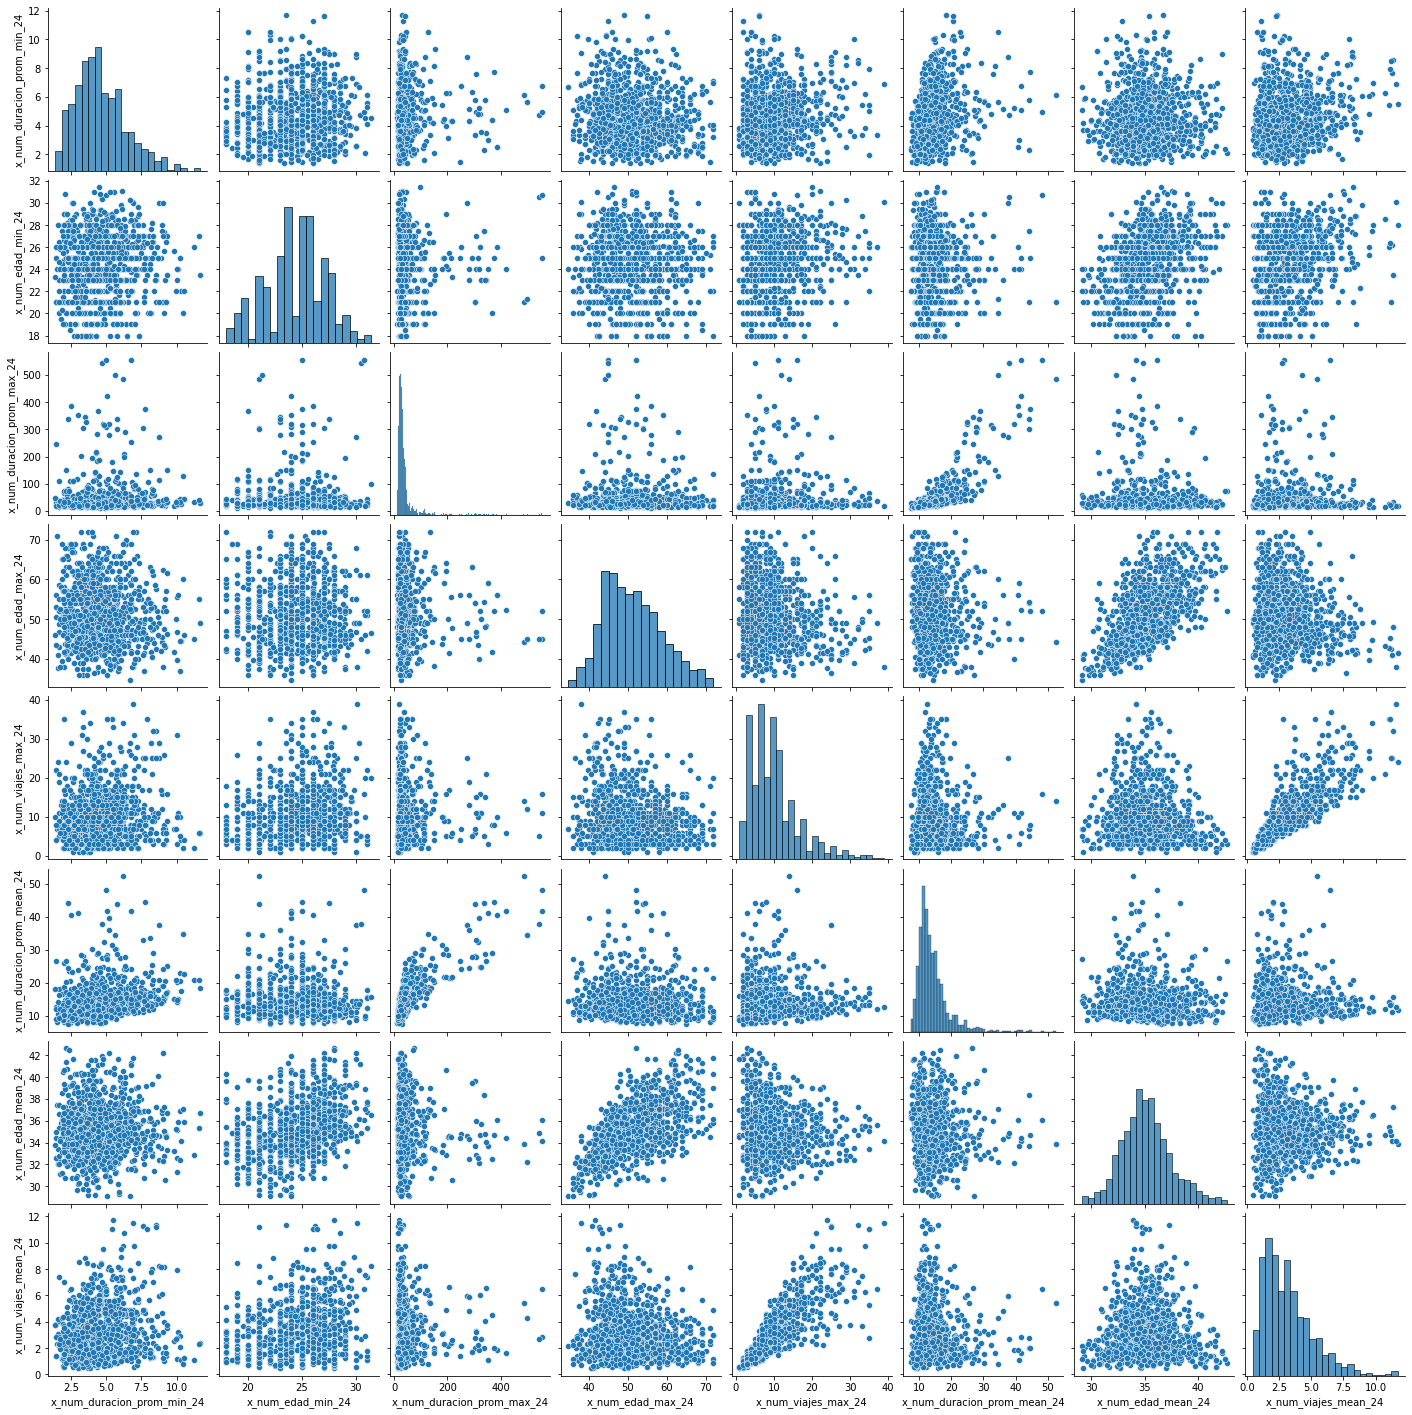

In [124]:
sns.pairplot(X[varc].sample(1000))

## Multicolinealidad

In [128]:
vc = VarClusHi(df=X[varc],feat_list=varc)
vc.varclus()
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio'],
                    ascending=[1,1]).reset_index(drop=True)
rs['id'] =rs.groupby('Cluster').cumcount()+1
rs

In [142]:
varc = rs.loc[rs['id']==1]['Variable'].tolist()
varc

['x_num_viajes_mean_24', 'x_num_duracion_prom_mean_24', 'x_num_edad_mean_24']

array([[<AxesSubplot:title={'center':'x_num_viajes_mean_24'}>,
        <AxesSubplot:title={'center':'x_num_duracion_prom_mean_24'}>],
       [<AxesSubplot:title={'center':'x_num_edad_mean_24'}>,
        <AxesSubplot:>]], dtype=object)

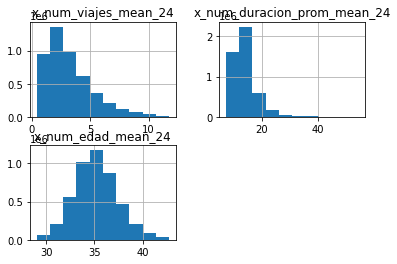

In [140]:
X[varc].hist()

## Ajuste regresión lineal $y = \theta\cdot x+\theta_0$

### Conjunto de entrenamiento,  $S_n=\lbrace((x^{(i)},y^{(i)}),i=1,\ldots,n\rbrace$

<AxesSubplot:>

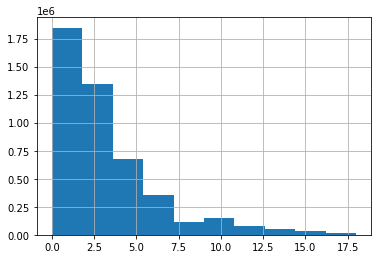

In [158]:
Sn = X[um+varc].merge(tad[um+[tgt]],how='inner')
Sn = Sn.loc[Sn['y']<=18].reset_index(drop=True)
Sn['y'].hist()

### Partición

In [159]:
X,y = Sn[varc].copy(),Sn['y'].copy()

In [162]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [163]:
Xt.shape,Xv.shape,yt.shape,yv.shape

((3268644, 3), (1400848, 3), (3268644,), (1400848,))

### Entrenamiento

In [165]:
modelo = LinearRegression(n_jobs=-1)

In [166]:
modelo.fit(Xt,yt)

LinearRegression(n_jobs=-1)

#### $\theta$

In [167]:
modelo.coef_

array([ 0.74956399, -0.01249007,  0.02484001])

#### $\theta_0$

In [168]:
modelo.intercept_

-0.023991405195683324

### Evaluar desempeño del modelo

#### Error de entrenamiento

In [170]:
mean_absolute_error(y_pred=modelo.predict(Xt),y_true=yt)

1.987048624743124

#### Error de validación

In [171]:
mean_absolute_error(y_pred=modelo.predict(Xv),y_true=yv)

1.9879906291633516

#### Visualización predicciones

(array([ 54410., 442722., 370038., 243190., 137050.,  74534.,  40796.,
         21837.,  11079.,   5192.]),
 array([0.41725027, 1.33259198, 2.2479337 , 3.16327541, 4.07861712,
        4.99395884, 5.90930055, 6.82464227, 7.73998398, 8.65532569,
        9.57066741]),
 <BarContainer object of 10 artists>)

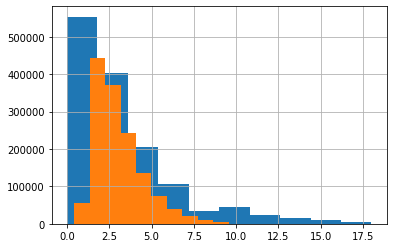

In [179]:
yv.hist()
plt.hist(modelo.predict(Xv))

In [182]:
Xv['y'] = yv
Xv['y^'] = modelo.predict(Xv[varc])

<ipython-input-182-87db74ed2e17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xv['y'] = yv
<ipython-input-182-87db74ed2e17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xv['y^'] = modelo.predict(Xv[varc])


/home/jose/entornos/diplo/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jose/entornos/diplo/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y^', ylabel='Density'>

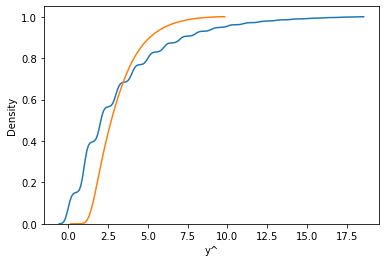

In [185]:
sns.distplot(yv,hist=False,kde_kws={'cumulative':True})
sns.distplot(Xv['y^'],hist=False,kde_kws={'cumulative':True})